In [46]:
%matplotlib notebook

In [47]:
#import dependencies

import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import os 
import pprint

from config import g_key

# Atlanta

In [48]:
# read in atlanta csv

atlanta_restaurant_totals = pd.read_csv("../Output/Data/atlanta_restaurants.csv")

In [49]:
atlanta_restaurant_totals


,Unnamed: 0,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,0,Little Bangkok,Atlanta,33.815930,-84.352190,30324,chinese,$$,4.0
1,1,Bao Bun Hibachi,Atlanta,33.801160,-84.414700,30318,chinese,$,4.5
2,2,Urban Wu,Atlanta,33.846710,-84.374065,30305,chinese,$$,4.0
3,3,Food Terminal,Atlanta,33.778829,-84.410034,30318,chinese,$$,4.5
4,4,Hibachi Buffet,Atlanta,33.841328,-84.327574,30329,chinese,$,4.5
...,...,...,...,...,...,...,...,...,...
1078,1078,Saigon Cafe - Cumberland,Atlanta,33.887040,-84.475595,30080,thai,$$,3.5
1079,1079,Thai Cafe,Atlanta,33.879660,-84.467664,30339,thai,NaN,2.5
1080,1080,T1 Bento,Atlanta,33.907766,-84.289732,30341,thai,$,4.0
1081,1081,Tin Drum Asian Kitchen - Akers Mill Square,Atlanta,33.882804,-84.462033,30339,thai,$,2.5


In [4]:

atlanta_summary_df = atlanta_restaurant_totals.groupby('ethnicity')

atlanta_summary_df.head()


,Unnamed: 0,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,0,Little Bangkok,Atlanta,33.815930,-84.352190,30324,chinese,$$,4.0
1,1,Bao Bun Hibachi,Atlanta,33.801160,-84.414700,30318,chinese,$,4.5
2,2,Urban Wu,Atlanta,33.846710,-84.374065,30305,chinese,$$,4.0
3,3,Food Terminal,Atlanta,33.778829,-84.410034,30318,chinese,$$,4.5
4,4,Hibachi Buffet,Atlanta,33.841328,-84.327574,30329,chinese,$,4.5
149,149,Le Colonial - Atlanta,Atlanta,33.837408,-84.380267,30305,french,NaN,4.5
150,150,Nikolai's Roof,Atlanta,33.761570,-84.383360,30303,french,$$$,4.0
151,151,Tiny Lou's,Atlanta,33.773360,-84.361350,30306,french,$$,4.0
152,152,Bistro Niko,Atlanta,33.846614,-84.368617,30326,french,$$,4.0
153,153,Cooks & Soldiers,Atlanta,33.786004,-84.411355,30318,french,$$,4.5


<IPython.core.display.Javascript object>


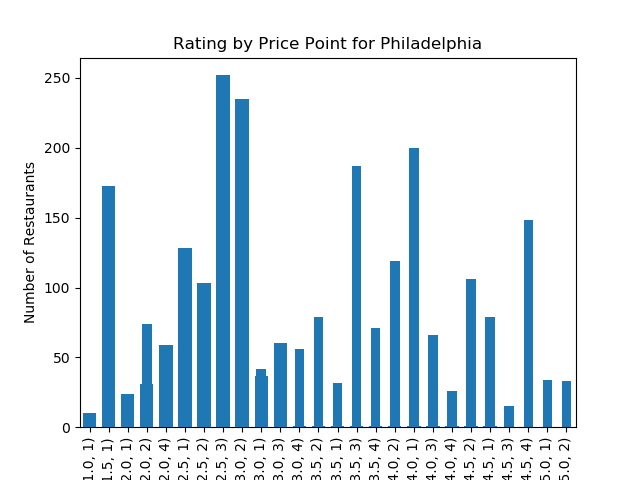

In [50]:
# Plot a bar chart for each ethnicity

bar_plot = atlanta_summary_df['ethnicity'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Ethnicity")
bar_plot.set_ylabel("Number of Restaurants")
bar_plot.set_title("Number of Restaurants by Ethnicity for Atlanta")
plt.savefig("../Output/Charts/barchart_rest_ethnicity_atlanta.png")
plt.show()





In [51]:
price_df = atlanta_restaurant_totals.dropna()
price_df['price_int'] = [ len(price) for price in price_df['price']]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
# value counts for ethnicities

ethnic_counts = price_df['ethnicity'].value_counts()

ethnic_counts

new_american    200
mexican         186
chinese         125
italian         112
japanese         85
thai             50
indian           47
greek            29
soulfood         24
french           18
brazilian         4
Name: ethnicity, dtype: int64

In [78]:
# Plot a bar chart for price level by ethnicity

#ethncities = [ethnicity for ethnicty in dollar_eth_gb[]]

price_df.groupby('ethnicity')['price_int'].value_counts().plot(kind='bar')

#Set labels 
bar_plot.set_xlabel("Price Level and Ethnicity")
bar_plot.set_ylabel("Number of Restaurants")
bar_plot.set_title("Price Point by Ethnicity for Atlanta")
plt.savefig("../Output/Charts/barchart_price_ethnicity_atlanta.png")
plt.show()

In [79]:
# Plot a bar chart price vs rating

price_df.groupby('rating')['price_int'].value_counts().plot(kind='bar')

#Set labels 
bar_plot.set_xlabel("Price Level and Rating")
bar_plot.set_ylabel("Number of Restaurants")
bar_plot.set_title("Rating by Price Point for Atlanta")
plt.savefig("../Output/Charts/barchart_price_rating_atlanta.png")
plt.show()

In [ ]:
#heat map

#configure gmaps
#gmaps.configure(api_key=g_key)

# Use the Lat and Lng as locations 
#locations = atlanta_restaurant_totals[["latitude", "longitude"]]



# Philadelphia

In [80]:
# read in philly csv

philly_restaurant_totals = pd.read_csv("../Output/Data/philadelphia_restaurants.csv")

In [81]:
philly_restaurant_totals

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Chubby Cattle,Philadelphia,39.954980,-75.156220,19107,chinese,NaN,4.5
1,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0
2,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0
3,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0
4,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0
...,...,...,...,...,...,...,...,...
714,A Taste of Thai,Philadelphia,39.953852,-75.157628,19107,thai,$$,3.0
715,Aya Asian Fusion,Philadelphia,40.036950,-75.039910,19136,thai,$$,3.5
716,Mikado Thai Pepper Restaurant,Philadelphia,40.006550,-75.288880,19003,thai,$$,3.5
717,Dream House Asian Bistro,Philadelphia,40.034385,-75.216117,19128,thai,$$,3.0


In [82]:
philly_summary_df = philly_restaurant_totals.groupby('ethnicity')

philly_summary_df.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Chubby Cattle,Philadelphia,39.954980,-75.156220,19107,chinese,NaN,4.5
1,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0
2,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0
3,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0
4,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0
173,Parc,Philadelphia,39.949172,-75.170727,19103,french,$$$,4.0
174,The Wayward,Philadelphia,39.950915,-75.159596,19107,french,NaN,4.5
175,Gabi,Philadelphia,39.959250,-75.161510,19102,french,$$,4.5
176,Townsend,Philadelphia,39.951097,-75.176542,19103,french,$$$,4.5
177,Forsythia,Philadelphia,39.948707,-75.145394,19106,french,NaN,4.5


In [83]:
# Plot a bar chart for each ethnicity

philly_bar_plot = philly_summary_df['ethnicity'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Ethnicity")
bar_plot.set_ylabel("Number of Restaurants")
bar_plot.set_title("Number of Restaurants by Ethnicity for Philadelphia")
plt.savefig("../Output/Charts/barchart_rest_ethnicity_philadelphia.png")
plt.show()


In [92]:
philly_price_df = philly_restaurant_totals.dropna()

philly_price_df['price_int'] = [ len(price) for price in philly_price_df['price']]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
# value counts for ethnicities

ethnic_counts = philly_price_df['ethnicity'].value_counts()

ethnic_counts

chinese        113
newamerican    107
italian         93
mexican         68
japanese        48
thai            29
soulfood        20
indpak          19
greek           18
french          15
brazilian        5
Name: ethnicity, dtype: int64

In [94]:
# Plot a bar chart for price level by ethnicity

#ethncities = [ethnicity for ethnicty in dollar_eth_gb[]]

philly_price_df.groupby('ethnicity')['price_int'].value_counts().plot(kind='bar')

#Set labels 
bar_plot.set_xlabel("Price Level and Ethnicity")
bar_plot.set_ylabel("Number of Restaurants")
bar_plot.set_title("Price Point by Ethnicity for Philadelphia")
plt.savefig("../Output/Charts/barchart_price_ethnicity_philadelphia.png")
plt.show()

In [95]:
# Plot a bar chart price vs rating

philly_price_df.groupby('rating')['price_int'].value_counts().plot(kind='bar')

#Set labels 
bar_plot.set_xlabel("Price Level and Rating")
bar_plot.set_ylabel("Number of Restaurants")
bar_plot.set_title("Rating by Price Point for Philadelphia")
plt.savefig("../Output/Charts/barchart_price_rating_philadelphia.png")
plt.show()

In [ ]:
#heat map

#configure gmaps
#gmaps.configure(api_key=g_key)

# Use the Lat and Lng as locations 
#locations = atlanta_restaurant_totals[["latitude", "longitude"]]
